# Exploring Stock Market Data

### In this project, I'm analyzing stock market data for the WIG20 index in August 2023, while creating a reusable Python Class.

###### I've obtained the data from an online source:
https://stooq.com/q/d/?s=wig20&c=0&d1=20230801&d2=20230831

In [1]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker

# Building the StockMarketAnalysis Class
class StockMarketAnalysis:
    
    def __init__(self, name, data_file):
        """
        Initialize the StockMarketAnalysis class with data from a CSV file.
        """
        self.name = name
        self.data = pd.read_csv(data_file,
                                usecols = ["Data",
                                         "Otwarcie",
                                         "Najwyzszy",
                                         "Najnizszy",
                                         "Zamkniecie",
                                         "Wolumen"
                                        ]
                               )
        self.data.columns = ["Date",
                             "Open",
                             "High",
                             "Low",
                             "Close",
                             "Volume"
                            ]
        self.data["Date"] = pd.to_datetime(self.data["Date"])
        self.data["Weekday"] = self.data["Date"].apply(lambda x: x.strftime("%A"))
        self.data.set_index("Date", inplace = True)

    def calculate_median_spread(self):
        """
        Calculate the median spread between high and low prices.
        """
        high_median = np.median(self.data["High"])
        low_median = np.median(self.data["Low"])
        spread_median = high_median - low_median
        return round(spread_median, 2)

    def calculate_open_std(self):
        """
        Calculate the standard deviation of open prices.
        """
        open_std = np.std(self.data["Open"])
        return round(open_std, 2)

    def format_y_labels(self, value, pos):
        """
        Format y-axis labels for thousands, millions, and billions.
        """
        if value >= 1e9:
            return f"{value / 1e9:.2f}B"
        elif value >= 1e6:
            return f"{value / 1e6:.2f}M"
        elif value >= 1e3:
            return f"{value / 1e3:.2f}K"
        return str(value)

    def plot_candlestick_chart(self, ax = None):
        """
        Plot a candlestick chart.
        """
        if ax is None:
            fig, ax = plt.subplots(figsize = (10, 5))
        
        # Style and colors
        col_up = '#4daf4a'  # Green
        col_down = '#e41a1c'  # Red
        alpha = 0.9
        width = 0.4
        shadow_width = 0.04
        
        # Plotting up price movements
        high = self.data[self.data['Close'] >= self.data['Open']]
        ax.bar(high.index,
               high['Close'] - high['Open'],
               width,
               bottom = high['Open'],
               color = col_up,
               alpha = alpha
              )
        ax.bar(high.index,
               high['High'] - high['Close'],
               shadow_width,
               bottom = high['Close'],
               color = col_up,
               alpha = alpha
              )
        ax.bar(high.index,
               high['Low'] - high['Open'],
               shadow_width,
               bottom = high['Open'],
               color = col_up,
               alpha = alpha
              )
        
        # Plotting down price movements
        low = self.data[self.data['Close'] < self.data['Open']]
        ax.bar(low.index,
               low['Close'] - low['Open'],
               width,
               bottom = low['Open'],
               color = col_down,
               alpha = alpha
              )
        ax.bar(low.index,
               low['High'] - low['Open'],
               shadow_width,
               bottom = low['Open'],
               color = col_down,
               alpha = alpha
              )
        ax.bar(low.index,
               low['Low'] - low['Close'],
               shadow_width,
               bottom = low['Close'],
               color = col_down,
               alpha = alpha
              )

        ax.set_title("Candlestick Chart")
        ax.grid(True)

        # Format y-axis labels using FuncFormatter
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.format_y_labels))

        # Rotate x-axis tick labels
        ax.tick_params(axis = 'x', rotation = 45)

    def plot_candlestick_chart_vs_volume(self, ax = None):
        """
        Plot a candlestick chart with a volume bar chart on a secondary y-axis.
        """
        if ax is None:
            fig, ax = plt.subplots(figsize = (10, 5))

        # Create a secondary y-axis (right) for volume
        ax_volume = ax.twinx()
        
        # Style and colors
        width = 0.4
        shadow_width = 0.04
        
        # Plotting up price movements
        high = self.data[self.data['Close'] >= self.data['Open']]
        ax.bar(high.index,
               high['Close'] - high['Open'],
               width,
               bottom = high['Open'],
               color = 'black'
              )
        ax.bar(high.index,
               high['High'] - high['Close'],
               shadow_width,
               bottom = high['Close'],
               color = 'black'
              )
        ax.bar(high.index,
               high['Low'] - high['Open'],
               shadow_width,
               bottom = high['Open'],
               color = 'black'
              )
        
        # Plotting down price movements
        low = self.data[self.data['Close'] < self.data['Open']]
        ax.bar(low.index,
               low['Close'] - low['Open'],
               width, bottom = low['Open'],
               color = 'white',
               edgecolor = 'black'
              )
        ax.bar(low.index,
               low['High'] - low['Open'],
               shadow_width,
               bottom = low['Open'],
               color = 'white',
               edgecolor = 'black'
              )
        ax.bar(low.index,
               low['Low'] - low['Close'],
               shadow_width,
               bottom = low['Close'],
               color = 'white',
               edgecolor = 'black'
              )

        ax.set_title("Traditional Candlestick Chart vs Volume")
        ax.grid(True)

        # Format y-axis labels for the candlestick chart
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.format_y_labels))

        # Rotate x-axis tick labels
        ax.tick_params(axis = 'x', rotation = 45)

        # Plot the volume as a bar chart on the secondary y-axis
        volume_colors = ['g' if c >= o else 'r'
                         for c, o in zip(self.data['Close'],
                                         self.data['Open']
                                        )
                        ]
        ax_volume.bar(self.data.index,
                      self.data['Volume'],
                      width = 0.1,
                      color = volume_colors,
                      alpha = 0.3
                     )
        ax_volume.set_ylabel("",
                             color = 'black'
                            )
        ax_volume.tick_params(axis = 'y',
                              labelcolor = 'black'
                             )
        ax_volume.yaxis.set_major_formatter(ticker.FuncFormatter(self.format_y_labels))

    def plot_close_price_evolution(self, ax = None):
        """
        Plot the evolution of close prices with shaded price range.
        """
        if ax is None:
            fig, ax = plt.subplots(figsize = (10, 5))

            # Format y-axis labels using FuncFormatter
            ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.format_y_labels))

        col_spread = '#f781bf'  # Pink
        col_close = '#984ea3'  # Purple

        ax.plot(self.data.index,
                self.data['Close'],
                color = col_close,
                alpha = 0.5,
                label = "Close"
               )
        ax.plot(self.data.index,
                self.data['High'],
                color = col_spread,
                linestyle = ":",
                label = "High"
               )
        ax.plot(self.data.index,
                self.data['Low'],
                color = col_spread,
                linestyle = ":",
                label = "Low"
               )
        ax.fill_between(self.data.index,
                        self.data['High'],
                        self.data['Low'],
                        color = col_spread,
                        alpha = 0.1
                       )
        
        # Format y-axis tick labels using the format_y_labels function
        ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(self.format_y_labels))

        ax.set_title("Close Price Evolution")
        ax.grid(True)

        # Rotate x-axis tick labels
        ax.tick_params(axis = 'x', rotation = 45)

    def plot_volume_distribution(self, ax = None):
        """
        Plot the distribution of trading volume per weekday.
        """
        if ax is None:
            fig, ax = plt.subplots(figsize = (10, 5))

        weekdays = ["Monday",
                    "Tuesday",
                    "Wednesday",
                    "Thursday",
                    "Friday"
                   ]

        # Group data by weekday and calculate the total volume for each weekday
        volume_by_weekday = self.data.groupby("Weekday")["Volume"].sum().reindex(weekdays)

        # Plot a histogram of the volume distribution per weekday
        volume_by_weekday.plot(kind = "bar",
                               ax = ax,
                               color = 'blue',
                               alpha = 0.5
                              )

        # Format y-axis tick labels using the format_y_labels function
        ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(self.format_y_labels))

        ax.set_title("Volume Distribution per Weekday")
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.yaxis.grid(True)

        # Rotate x-axis tick labels
        ax.tick_params(axis = 'x', rotation = 0)

        # Add white lines between grid lines
        for position in ax.get_ygridlines():
            position.set_color('white')
            position.set_linewidth(2)
            
    def plot_combined_graph(self, plot_type = "both"):
        """
        Plot a combination of candlestick, close price, and volume graphs.
        """
        
        # Creating a 2x2 grid of subplots
        fig, axs = plt.subplots(2, 2, figsize = (14, 10))

        if plot_type == "candlestick" or plot_type == "both":
            self.plot_candlestick_chart(ax = axs[0, 0])
        if plot_type == "close_price" or plot_type == "both":
            self.plot_close_price_evolution(ax = axs[0, 1])
            # Adding y-axis labels for Close Price Evolution on the right side
            axs[0, 1].yaxis.tick_right()
            axs[0, 1].set_ylabel("", rotation = 270, labelpad = 20)
        if plot_type == "candlestick_vs_volume" or plot_type == "both":
            self.plot_candlestick_chart_vs_volume(ax = axs[1, 0])
        if plot_type == "volume_distribution" or plot_type == "both":
            self.plot_volume_distribution(ax = axs[1, 1])
            # Adding y-axis labels for Volume Distribution on the right side
            axs[1, 1].yaxis.tick_right()
            axs[1, 1].set_ylabel("", rotation = 270, labelpad = 20)

        # Major Title
        # Finally, the major title provides an overall analysis context.
        fig.suptitle(self.name, fontsize = 16)

        # Adjusting layout with a wider gap between the left and right side charts
        plt.tight_layout(rect = [0, 0.03, 1, 0.95])
    
        plt.show()

# Example usage:
# analysis = StockMarketAnalysis("Stock Data", "your_data.csv")
# analysis.plot_combined_graph(plot_type = "both")

###### First, let's create an instance of the class we just created:

In [2]:
wig20_aug = StockMarketAnalysis("WIG20 - August 2023",
                                os.path.join(os.getcwd(),
                                             "Downloads",
                                             "wig20_d.csv"
                                            )
                               )

###### Now, we can explore the data and calculate some basic statistics:

In [3]:
wig20_aug.name

'WIG20 - August 2023'

In [4]:
type(wig20_aug.data)

pandas.core.frame.DataFrame

###### It is a data frame object, which means we can use standard pandas functions:

In [5]:
wig20_aug.data

,Open,High,Low,Close,Volume,Weekday
Date,,,,,,
2023-08-01,2193.35,2193.77,2174.65,2188.77,13747540,Tuesday
2023-08-02,2177.36,2177.36,2142.82,2142.82,14883443,Wednesday
2023-08-03,2139.83,2145.01,2120.93,2141.81,13001280,Thursday
2023-08-04,2152.32,2173.40,2152.32,2169.73,10052286,Friday
2023-08-07,2167.78,2168.37,2145.93,2152.17,9919087,Monday
2023-08-08,2148.86,2148.86,2106.44,2113.37,15746204,Tuesday
2023-08-09,2099.14,2118.52,2089.72,2096.43,17771305,Wednesday
2023-08-10,2097.72,2143.51,2097.72,2130.58,16696381,Thursday
2023-08-11,2124.08,2124.08,2098.84,2105.31,13284271,Friday


###### In the next step we are calling our custom made functions:

In [6]:
wig20_aug.calculate_median_spread()

27.78

In [7]:
wig20_aug.calculate_open_std()

62.05

###### Below we can see a candlestick chart, straight from a trading platform:

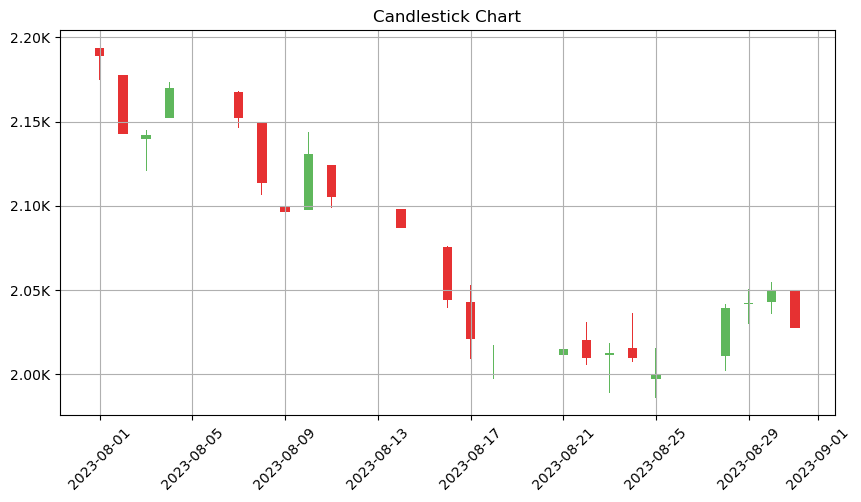

In [8]:
wig20_aug.plot_candlestick_chart()

###### In the candlestick chart below, we can see more traditional, black and white candles. The plot has two vertical axes, which show the price. and the volume. Green volume bars represent a situation where more people where buing the stock corresponding to this index. Red means the opposite.

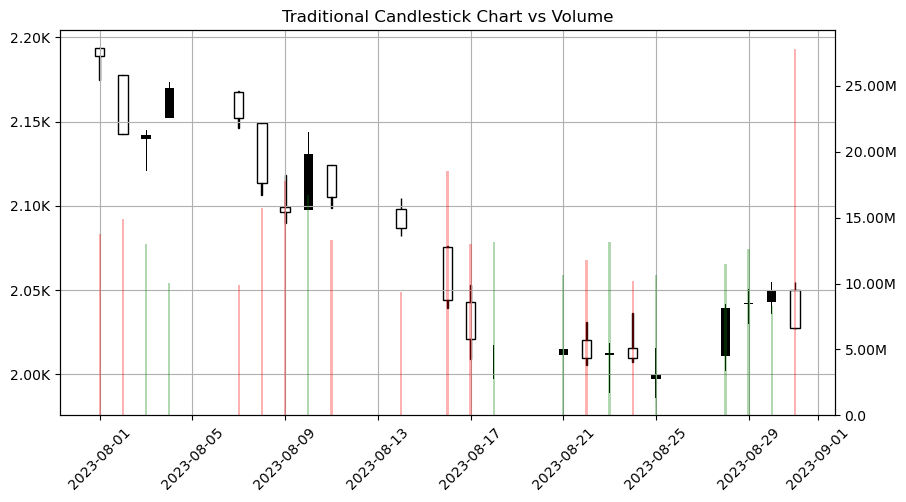

In [9]:
wig20_aug.plot_candlestick_chart_vs_volume()

###### In the next plot, we can see a histogram, showing five bins, for each weekday. The bins are sliced along horizontal gridlines, so that the user can compare each with ease.

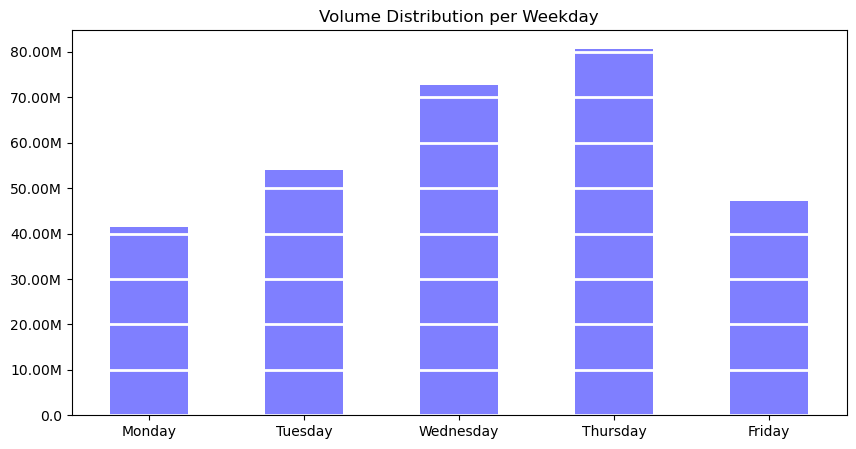

In [10]:
wig20_aug.plot_volume_distribution()

###### In the line plot below, we can see an artistic evolution of the close price, with an aura created by high and low prices.

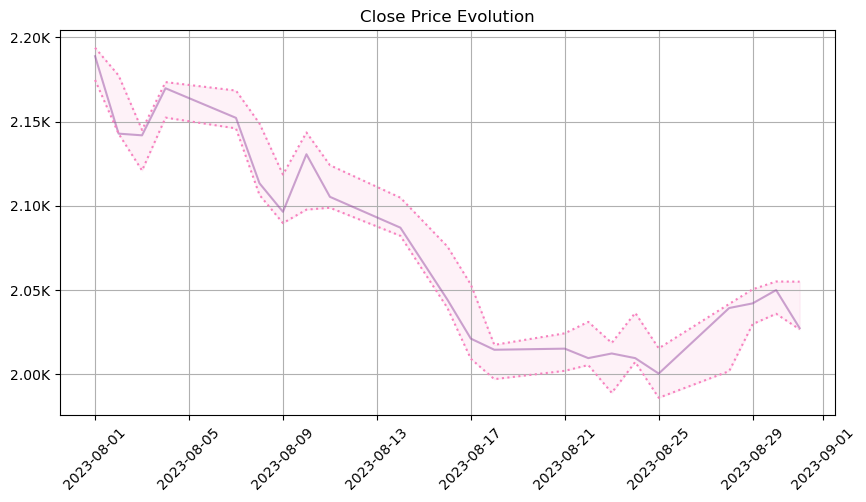

In [11]:
wig20_aug.plot_close_price_evolution()

###### Last step is to present the combined plot, which showcases all four plots:

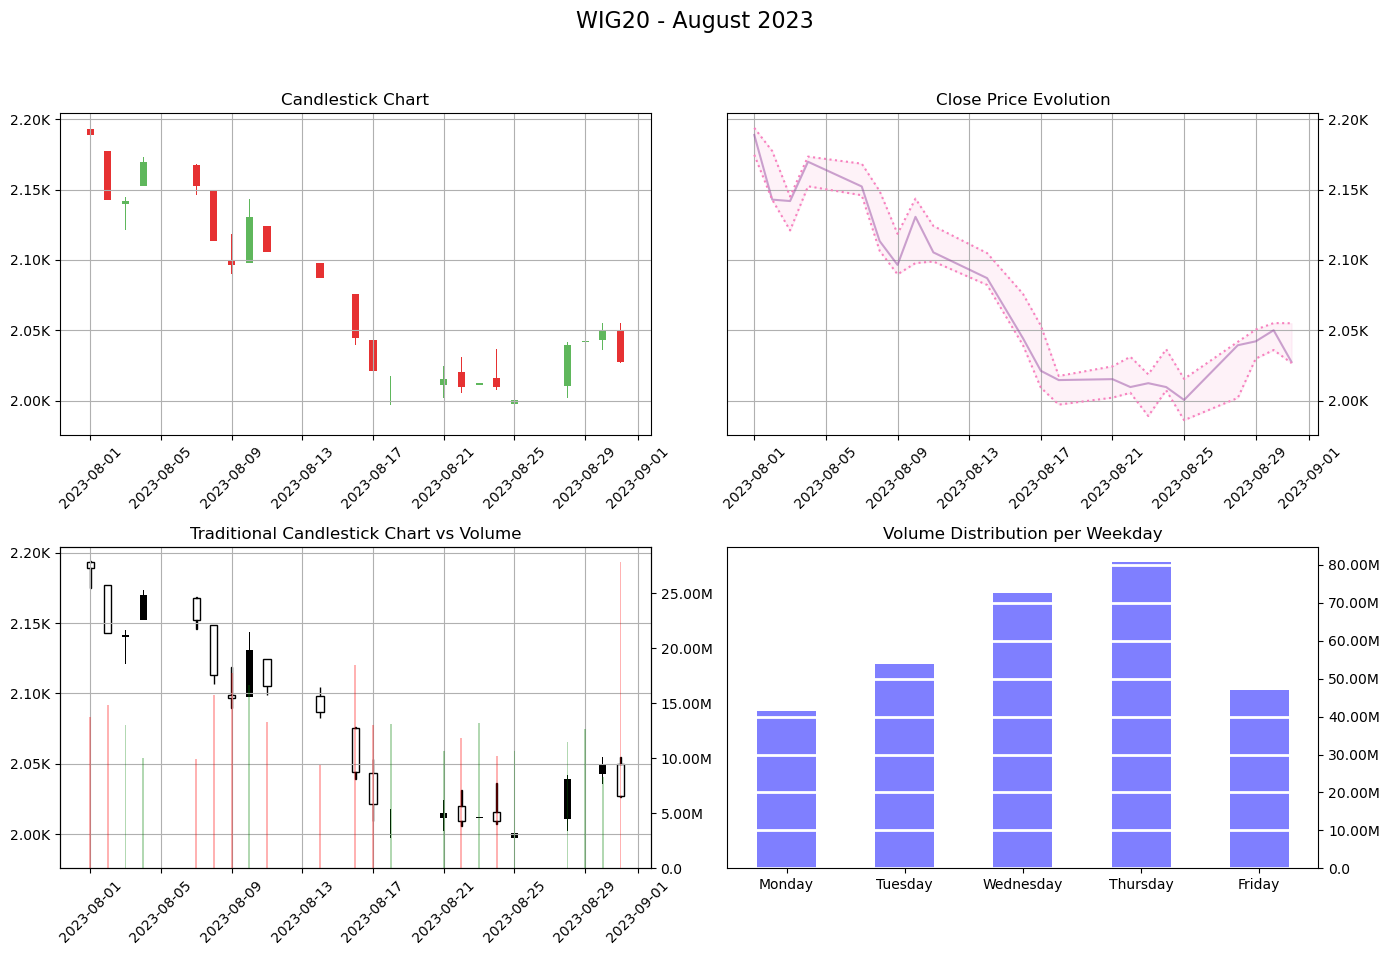

In [12]:
wig20_aug.plot_combined_graph()

###### Thank You!